In [2]:
"""
Author: Ryan Quirk, Huntley Hedrick, Matthew Griffith
Files: Analysis.ipynb, soccer_data.xlsx
Project Description: 
"""

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_excel("soccer_data.xlsx") 

# First visualization shows the average number of goals per age ranges
# Age ranges are >20, 20-24, 25-29, 30+


age_count = {}
b20 = []
b25 = []
b30 = []
b35 = []
a35 = []

for index, row in df.iterrows():
    age = row["Age"]
    goals = row["Goals"]

    if age in age_count.keys():
        age_count.update({age: age_count[age] + 1})
    else:
        age_count.update({age: 1})

    if age < 20:
        b20.append(goals)
        continue
    elif age < 25:
        b25.append(goals)
        continue
    elif age < 30:
        b30.append(goals)
        continue
    elif age < 35:
        b35.append(goals)
        continue
    else:
        a35.append(goals)

ranges = [">20", "20-24", "25-29", "30-34", "35+"]
values = [sum(b20)/len(b20), sum(b25)/len(b25), sum(b30)/len(b30), sum(b35)/len(b35), sum(a35)/len(a35) ]


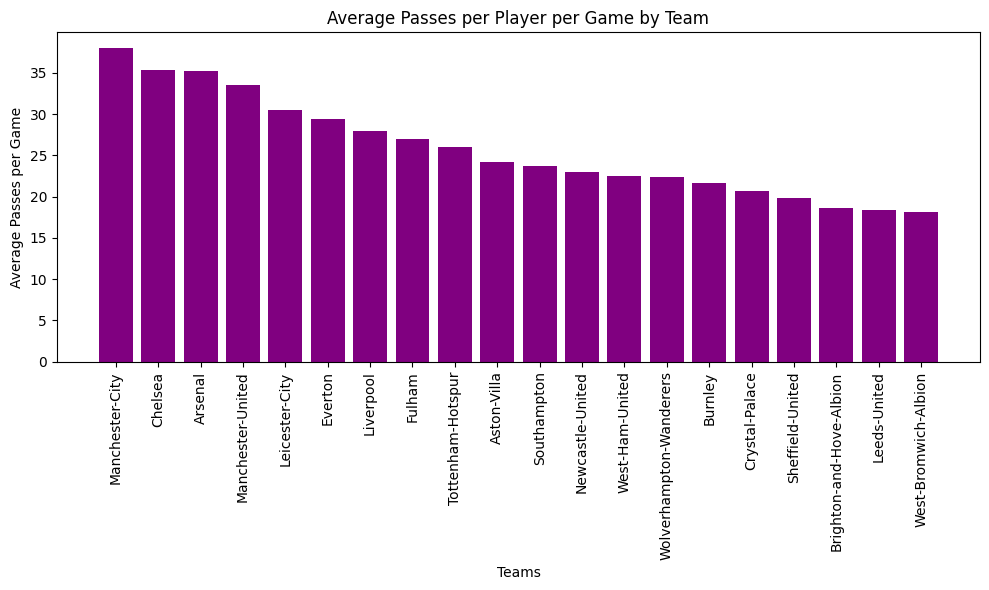

In [3]:
#Initialize dictionaries and lists
team_passes = {}  # Dictionary to store passes for each team

for index, row in df.iterrows():
    team = row["Club"]
    passes = row["Passes per match"]

    # Skip rows with missing or invalid values
    if pd.isnull(passes):
        continue

    # Collect passes per match for each team
    if team in team_passes:
        team_passes[team].append(passes)
    else:
        team_passes[team] = [passes]

# Compute average passes for each team
teams = list(team_passes.keys())
average_passes = [
    sum(team_passes[team]) / len(team_passes[team]) if team_passes[team] else 0
    for team in teams
]

# Sort teams by average passes (optional, for a cleaner plot)
sorted_data = sorted(zip(teams, average_passes), key=lambda x: x[1], reverse=True)
sorted_teams, sorted_averages = zip(*sorted_data)

# Plot the results
plt.figure(figsize=(10, 6))  # Adjust figure size if necessary
plt.bar(sorted_teams, sorted_averages, color="purple")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel("Teams")
plt.ylabel("Average Passes per Game")
plt.title("Average Passes per Player per Game by Team")
plt.tight_layout()  # Adjust layout to prevent label clipping
plt.show()

### The Code Above:

Calculates the values for the plots below. It does this by iterating through the dataset and tallying each player that has a certain age. While iterating, it also checks for which age range the player belongs in and adds their goals to that age range. Finally with the goal values populated per each age range, create a list of the average goals per age range.

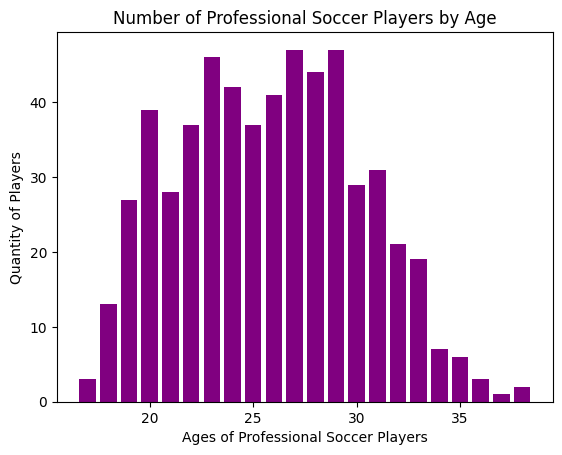

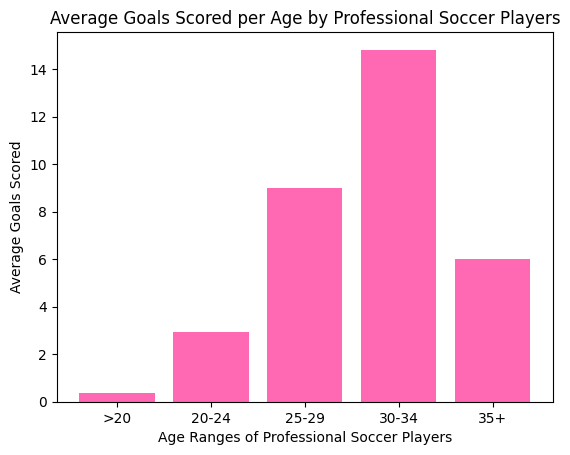

In [4]:
# Quantity of players sorted by age
plt.bar(age_count.keys(), age_count.values(), color="purple")
plt.xlabel("Ages of Professional Soccer Players")
plt.ylabel("Quantity of Players")
plt.title("Number of Professional Soccer Players by Age")
plt.show()


# Average Number of Goals Scored per Age Range
plt.bar(ranges, values, color="hotpink")
plt.xlabel("Age Ranges of Professional Soccer Players")
plt.ylabel("Average Goals Scored")
plt.title("Average Goals Scored per Age by Professional Soccer Players")
plt.show()


### Analysis

Interesting insight can be seen from the graphs above. The first graph showing that the average age of professional soccer players around 25 years old with outliers in the population lingering above 35. Furthermore the second graph shows that older players score higher goals on average with the range 30-34 scoring the highest.

In [5]:
# print(df)

df_midfi = df[df['Position'] == 'Midfielder']
df_gk = df[df['Position'] == 'Goalkeeper']
df_def = df[df['Position'] == 'Midfielder']
df_frd = df[df['Position'] == 'Forward']


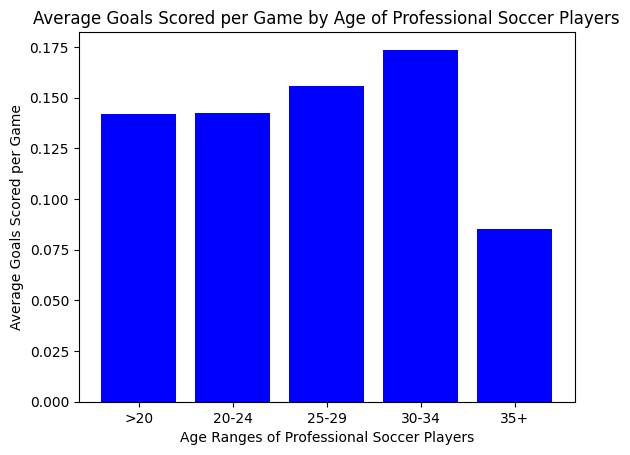

In [6]:
# Initialize dictionaries and lists
new_age_count = {}
nb20, nb25, nb30, nb35, na35 = [], [], [], [], []

for index, row in df.iterrows():
    age = row["Age"]
    goals = row["Goals per match"]
    goalCheck = row["Goals"]

    # Skip rows with missing or invalid values
    if pd.isnull(goals) or goals > 0.99:
        continue

    # Update age count
    if age in new_age_count:
        new_age_count[age] += 1
    else:
        new_age_count[age] = 1

    # Categorize goals based on age range
    if goalCheck > 0:
        if age < 20:
            nb20.append(goals)
        elif age < 25:
            nb25.append(goals)
        elif age < 30:
            nb30.append(goals)
        elif age < 35:
            nb35.append(goals)
        else:
            na35.append(goals)

# Compute averages safely
new_ranges = [">20", "20-24", "25-29", "30-34", "35+"]
new_values = [
    sum(nb20) / len(nb20) if nb20 else 0,
    sum(nb25) / len(nb25) if nb25 else 0,
    sum(nb30) / len(nb30) if nb30 else 0,
    sum(nb35) / len(nb35) if nb35 else 0,
    sum(na35) / len(na35) if na35 else 0,
]

# Plot the results
plt.bar(new_ranges, new_values, color="blue")
plt.xlabel("Age Ranges of Professional Soccer Players")
plt.ylabel("Average Goals Scored per Game")
plt.title("Average Goals Scored per Game by Age of Professional Soccer Players")
plt.show()


In [7]:
pos_map = {
    'Goalkeeper': 1,
    'Defender': 2,
    'Midfielder': 3,
    'Forward': 4
}

df['Position'] = df['Position'].str.strip().str.title()

# Apply mapping
df['Position_Numeric'] = df['Position'].map(pos_map)

# Check for unmapped positions
unmapped_positions = df[df['Position_Numeric'].isnull()]['Position'].unique()
if len(unmapped_positions) > 0:
    print("Unmapped Positions Found:", unmapped_positions)

# Correct unmapped positions manually (example for typos or alternative spellings)
# You can expand the pos_map or directly fix values in the dataset
# Example:
# df['Position'] = df['Position'].replace({'Mid Fielder': 'Midfielder'})

# After ensuring no NaN values, calculate correlation coefficient
if df['Position_Numeric'].isnull().any():
    print("Fix unmapped positions before calculating correlation.")
else:
    corr = np.corrcoef(df['Position_Numeric'], df['Goals'])[0, 1]
    print("Correlation Coefficient between Position and Goals:", corr)

# print(df)

Correlation Coefficient between Position and Goals: 0.3895369156093649


In [8]:
df_cleaned = df[df['Appearances'] > 0]

pos_map = {
    'Goalkeeper': 1,
    'Defender': 2,
    'Midfielder': 3,
    'Forward': 4
}

df_cleaned['Position'] = df_cleaned['Position'].str.strip().str.title()

# Apply mapping
df_cleaned['Position_Numeric'] = df_cleaned['Position'].map(pos_map)

# Check for unmapped positions
unmapped_positions = df_cleaned[df_cleaned['Position_Numeric'].isnull()]['Position'].unique()
if len(unmapped_positions) > 0:
    print("Unmapped Positions Found:", unmapped_positions)

# Correct unmapped positions manually (example for typos or alternative spellings)
# You can expand the pos_map or directly fix values in the dataset
# Example:
# df['Position'] = df['Position'].replace({'Mid Fielder': 'Midfielder'})

# After ensuring no NaN values, calculate correlation coefficient
if df_cleaned['Position_Numeric'].isnull().any():
    print("Fix unmapped positions before calculating correlation.")
else:
    corr = np.corrcoef(df_cleaned['Position_Numeric'], df_cleaned['Goals'])[0, 1]
    print("Correlation Coefficient between Position and Goals:", corr)
    # corr = np.corrcoef(df_cleaned['Po'])

Correlation Coefficient between Position and Goals: 0.3984861901342884


C:\Users\huntl\AppData\Local\Temp\ipykernel_12032\84834905.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Position'] = df_cleaned['Position'].str.strip().str.title()
C:\Users\huntl\AppData\Local\Temp\ipykernel_12032\84834905.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Position_Numeric'] = df_cleaned['Position'].map(pos_map)


In [9]:
df_LP = df_cleaned[df_cleaned['Club'] == 'Liverpool']
df_TN = df_cleaned[df_cleaned['Club'] == 'Tottenham-Hotspur']
df_BR = df_cleaned[df_cleaned['Club'] == 'Brighton-and-Hove-Albion']


# multi-linear regression

In [10]:
target_column = "Wins"

# Filter for numerical columns
numerical_df = df.select_dtypes(include=["number"])

# Iterate through numerical columns and compute correlation with the target column
correlations = {}
for col in numerical_df.columns:
    if col != target_column:  # Skip the target column itself
        correlations[col] = numerical_df[target_column].corr(numerical_df[col])

correlations_series = pd.Series(correlations)

# Sort by correlation values in descending order and take the top 10
top_correlations = correlations_series.sort_values(ascending=False).head(17)

# Display horizontally
print(top_correlations.to_frame("Correlation").T)

             Clean sheets  Throw outs  Appearances  Goal Kicks  Recoveries  \
Correlation      0.981137     0.95401     0.941177    0.916603    0.908909   

                Saves  Duels won   Punches    Passes  Duels lost  \
Correlation  0.908715    0.90188  0.899117  0.896393    0.889971   

             Sweeper clearances  Goals conceded     Shots  High Claims  \
Correlation            0.878544        0.860522  0.833347     0.820034   

              Tackles   Catches  Aerial battles lost  
Correlation  0.815247  0.809441             0.805866  


             Clean sheets  Throw outs  Appearances  Goal Kicks  Recoveries  \
Correlation      0.981137     0.95401     0.941177    0.916603    0.908909   

                Saves  
Correlation  0.908715  


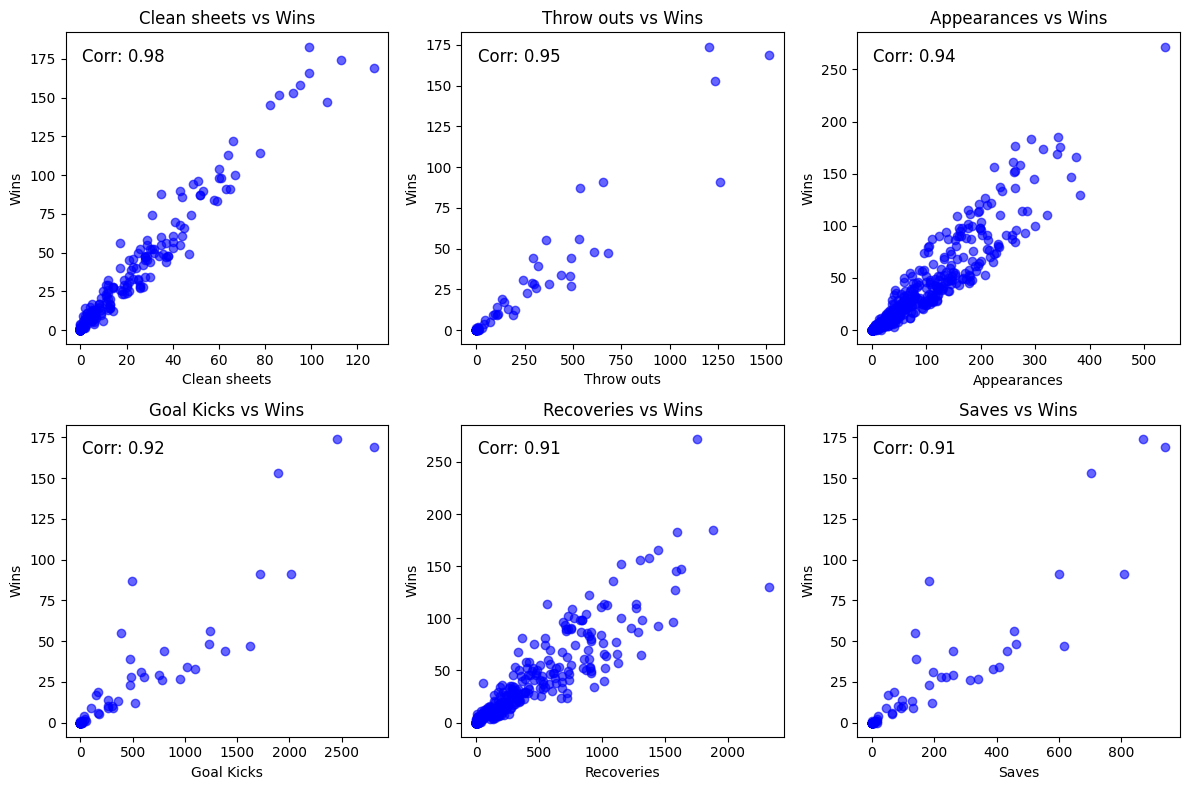

In [11]:
target_column = "Wins"

# Filter for numerical columns
numerical_df = df.select_dtypes(include=["number"])

# Compute correlations with the target column
correlations = {}
for col in numerical_df.columns:
    if col != target_column:  # Skip the target column itself
        correlations[col] = numerical_df[target_column].corr(numerical_df[col])

# Convert to a pandas Series for easy manipulation
correlations_series = pd.Series(correlations)

# Sort by correlation values in descending order and take the top 6 (or adjust as needed)
top_correlations = correlations_series.sort_values(ascending=False).head(6)

# Display the top correlations
print(top_correlations.to_frame("Correlation").T)

# Plot the top correlations
plt.figure(figsize=(12, 8))
for i, (feature, corr_value) in enumerate(top_correlations.items(), 1):
    plt.subplot(2, 3, i)  # Create a grid of 2x3 plots
    plt.scatter(df[feature], df[target_column], color='blue', alpha=0.6)
    plt.xlabel(feature)
    plt.ylabel(target_column)
    plt.title(f'{feature} vs {target_column}')

    # Add correlation value as text
    corr_text = f'Corr: {corr_value:.2f}'
    plt.text(0.05, 0.95, corr_text, ha='left', va='top', transform=plt.gca().transAxes, fontsize=12, color='black')

plt.tight_layout()
plt.show()

In [12]:
# Filtered dataset excluding Goalkeepers
df_cleaned = df_cleaned[df_cleaned["Position"] != "Goalkeeper"]
print(len(df_cleaned))



df_fw = df_cleaned[df_cleaned['Position'] == 'Forward']

print(len(df_fw))
# Select specific columns and count NaN values
nan_counts = df_fw[["Appearances", "Clean sheets", "Recoveries", "Tackles", 
                         "Duels won", "Passes", "Goals conceded"]].isna().sum()



# print(df_fw)



# Sort the columns by the number of NaN values in descending order
sorted_nan_counts = nan_counts.sort_values(ascending=False)

# Display the columns with the most NaN values
print("Sorted NaN counts:")
print(sorted_nan_counts)

# Optional: Display only columns with NaN values
columns_with_nans = sorted_nan_counts[sorted_nan_counts > 0]
print("Columns with NaN values:")
print(columns_with_nans)


435
101
Sorted NaN counts:
Clean sheets      101
Goals conceded    101
Recoveries         97
Duels won          97
Appearances         0
Tackles             0
Passes              0
dtype: int64
Columns with NaN values:
Clean sheets      101
Goals conceded    101
Recoveries         97
Duels won          97
dtype: int64


mean_squared_error :  46.0395267309512
mean_absolute_error :  4.445206835427435
47
47
47


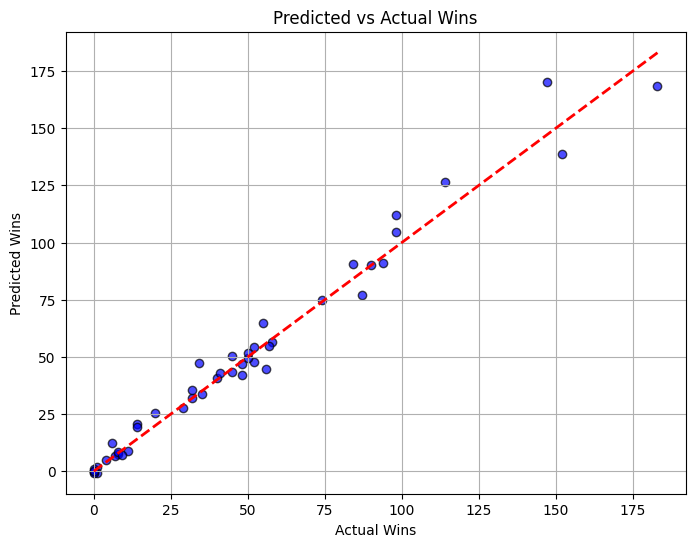

In [13]:
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing 

features = ["Clean sheets", "Appearances", "Recoveries", "Duels won", "Passes", "Goals conceded", "Tackles"]

df_cleaned = df_cleaned[df_cleaned["Position"] != "Goalkeeper"]
df_cleaned = df_cleaned.dropna(subset=features + ["Wins"])
X = df_cleaned[features]
y = df_cleaned["Wins"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) 

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print('mean_squared_error : ', mean_squared_error(y_test, predictions)) 
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions)) 

print(len(X_test))
print(len(y_test))
print(len(predictions))

"""
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(X_test, predictions, c='b', label="Predicted")
ax1.scatter(X_test, y_test, c='r', label="Real")
plt.legend("upper left")
plt.show()
"""

# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.7, color="blue", edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title("Predicted vs Actual Wins")
plt.xlabel("Actual Wins")
plt.ylabel("Predicted Wins")
plt.grid(True)
plt.show()

In [14]:

def is_column_mostly_empty(df, position_column, target_position, target_column, threshold=0.5):
    """
    Check if the specified column is mostly empty (NaN) for a given position.

    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.
        position_column (str): The column containing player positions (e.g., "Position").
        target_position (str): The specific position to filter by (e.g., "Forward").
        target_column (str): The column to check for NaN values (e.g., "Errors leading to goal").
        threshold (float): The fraction of rows that must be NaN for the column to be considered "mostly empty".
                           Default is 0.5 (50%).

    Returns:
        bool: True if the column is mostly empty for the given position, False otherwise.
    """
    # Filter the DataFrame for the specified position
    filtered_df = df[df[position_column] == target_position]

    # Calculate the fraction of NaN values in the target column
    num_missing = filtered_df[target_column].isna().sum()
    total_rows = len(filtered_df)
    
    # Avoid division by zero if there are no rows for the given position
    if total_rows == 0:
        print(f"No rows found for position '{target_position}'.")
        return False

    # Check if the fraction of missing values exceeds the threshold
    fraction_missing = num_missing / total_rows
    return fraction_missing > threshold

# Example usage:
# Assuming `df` is your DataFrame with columns "Position" and "Errors leading to goal":
position_column = "Position"
target_position = "Forward"
target_column = "Errors leading to goal"

result = is_column_mostly_empty(df, position_column, target_position, target_column, threshold=0.5)
if result:
    print(f"The column '{target_column}' is mostly empty for position '{target_position}'.")
else:
    print(f"The column '{target_column}' is not mostly empty for position '{target_position}'.")


The column 'Errors leading to goal' is mostly empty for position 'Forward'.
